In [2]:
import os
from PIL import Image
from torchvision import datasets, transforms
from torch.utils.data import DataLoader

# Checking image and its type

In [3]:
def check_ext(dir, supported_extention = ('png', 'jpg', 'jpeg')):

    invalid_images = []
    unsupported_images = []

    for root, _ ,files in os.walk(dir):
        for filename in files:
            file_path = os.path.join(root, filename)
            
        
            if not filename.lower().endswith(supported_extention):
                unsupported_images.append(file_path)
                os.remove(file_path)
                continue

            try:
                with Image.open(file_path) as img:
                    img.verify()
            except (IOError, SyntaxError):
                print(f'REMOVING {file_path}')
                invalid_images.append()
                os.remove(file_path)
    print("IMAGE CHECK REPORT")
    print(f"Unsupported images : {len(unsupported_images)}")
    print(f"invalid images : {len(invalid_images)}")


check_ext("dataset")
    



 

IMAGE CHECK REPORT
Unsupported images : 0
invalid images : 0


# DATA ARGUMENTATION

In [4]:
import torch
from torchvision import transforms
from PIL import Image
import os

train_argumentation = transforms.Compose([
    transforms.RandomHorizontalFlip(p =0.5),
    transforms.RandomHorizontalFlip(p=0.5),  # Flip horizontally with 50% probability
    transforms.RandomVerticalFlip(p=0.5),  # Flip vertically with 50% probability
    transforms.RandomRotation(degrees=30),  # Rotate image randomly up to ±30 degrees
    transforms.RandomResizedCrop(size=(224, 224), scale=(0.7, 1.0)),  # Random crop and resize
    transforms.ColorJitter(brightness=0.3, contrast=0.3, saturation=0.3, hue=0.2),  # Random color jitter
    transforms.GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0)),  # Random Gaussian blur
    transforms.RandomAffine(degrees=20, translate=(0.1, 0.1), scale=(0.8, 1.2), shear=10),  # Random affine transformations
    transforms.RandomPerspective(distortion_scale=0.5, p=0.5),  # Simulate perspective distortion
    transforms.RandomGrayscale(p=0.1),  # Randomly convert to grayscale with 10% probability
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize as per ImageNet
])

val_transforms = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize to 224x224
    transforms.ToTensor(),  # Convert to PyTorch tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # Normalize as per ImageNet
])


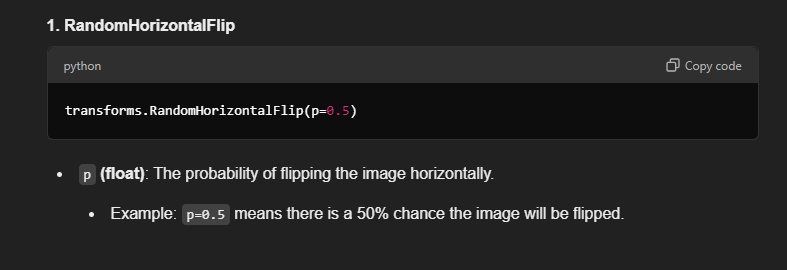 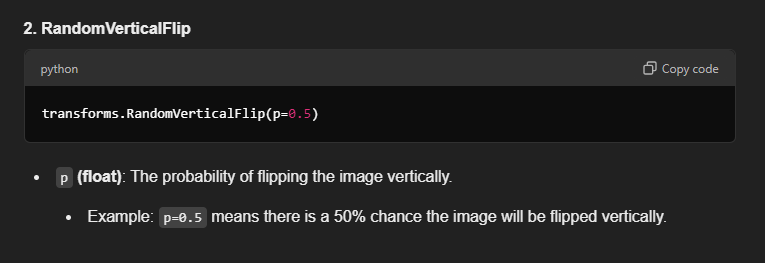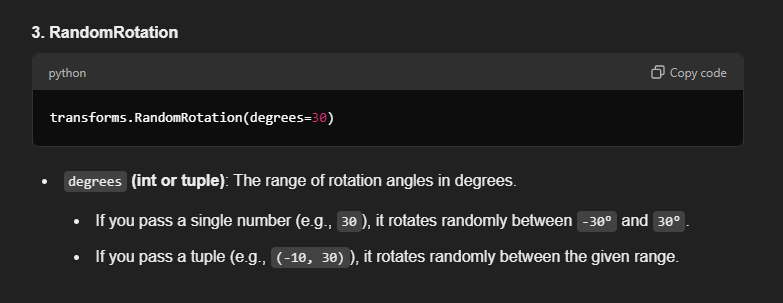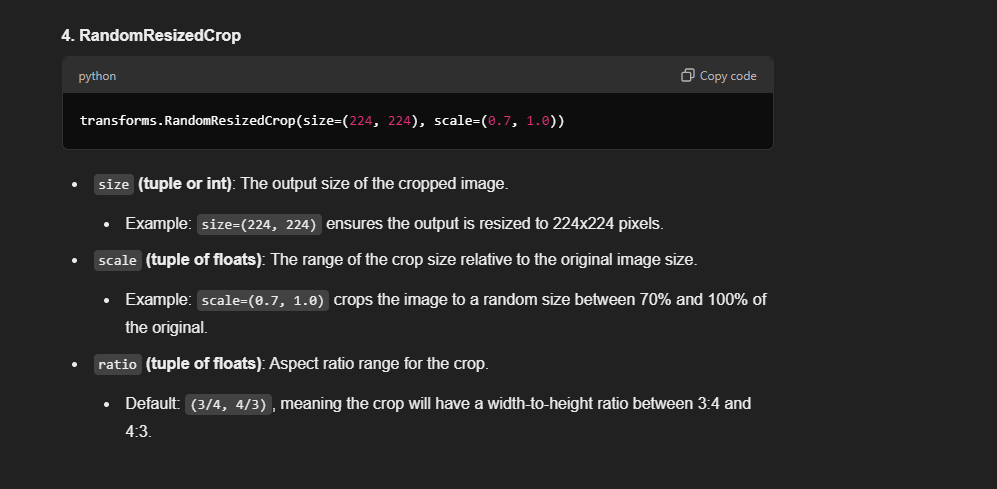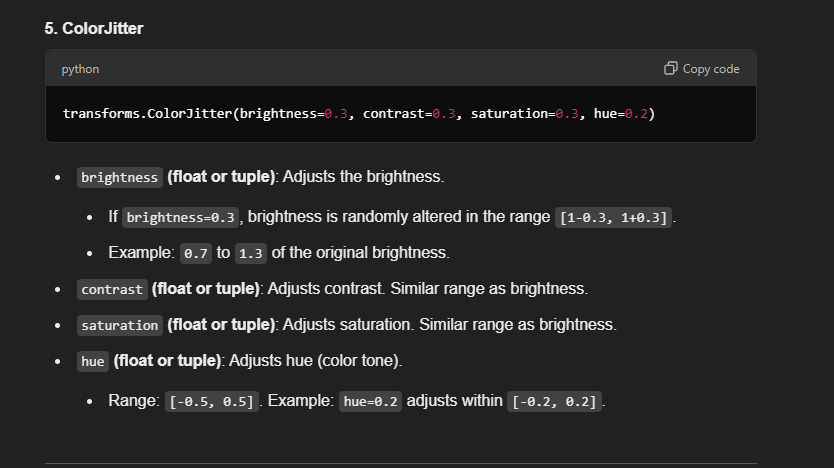 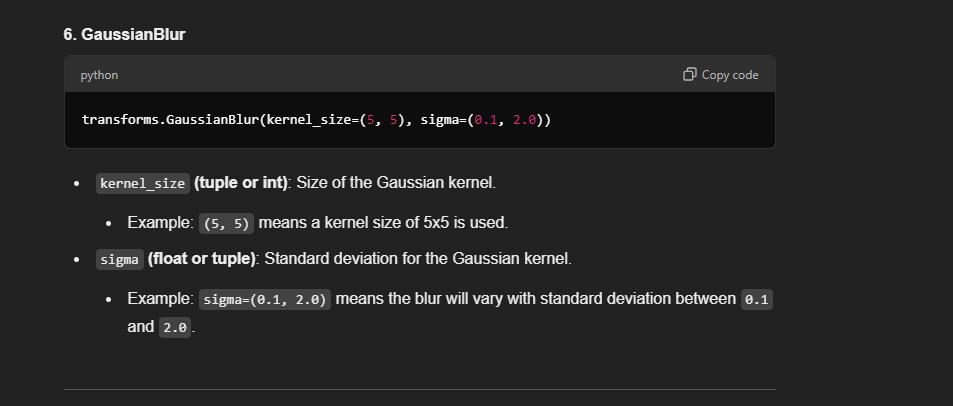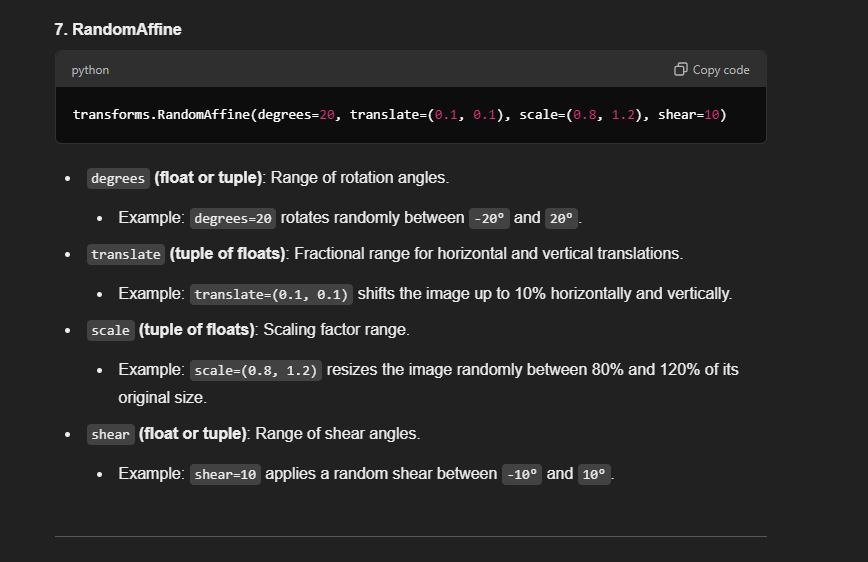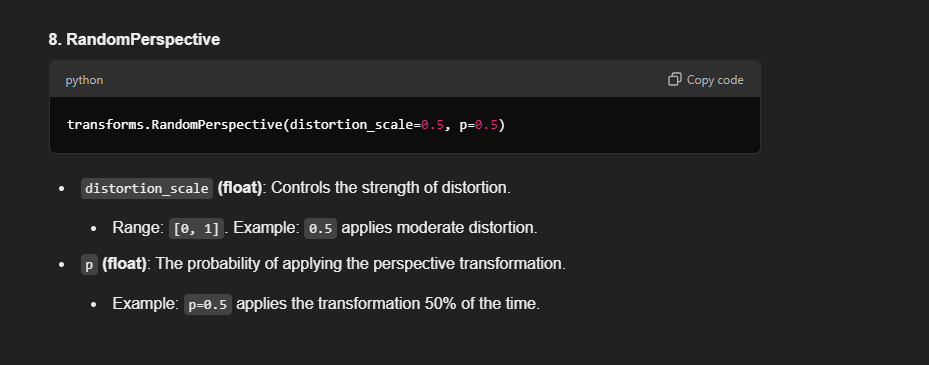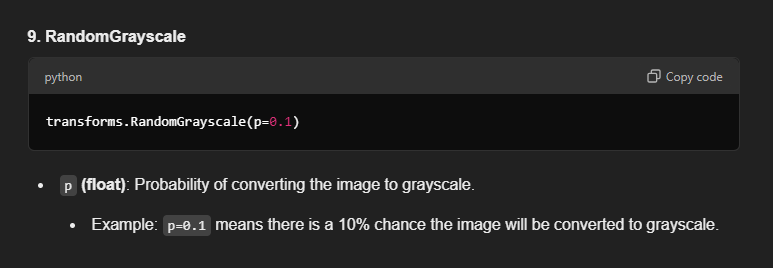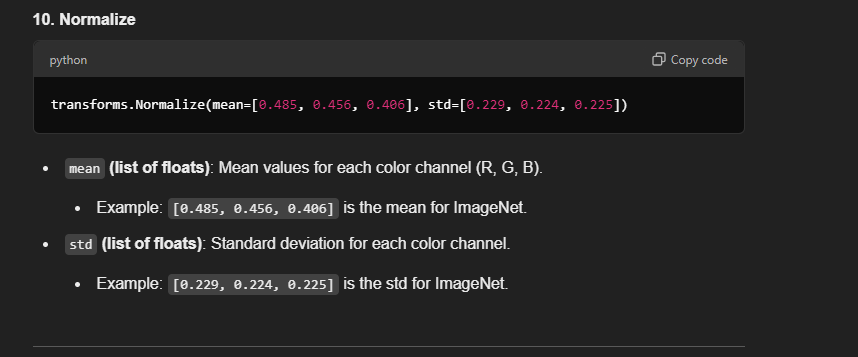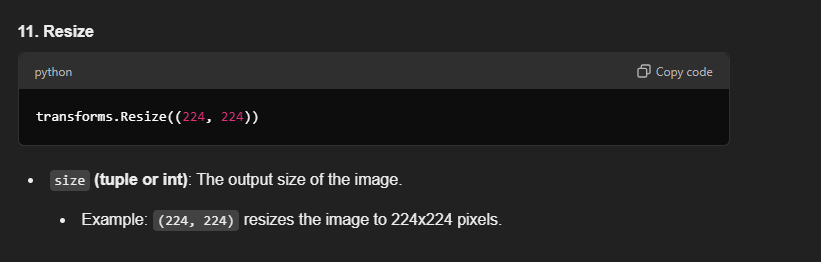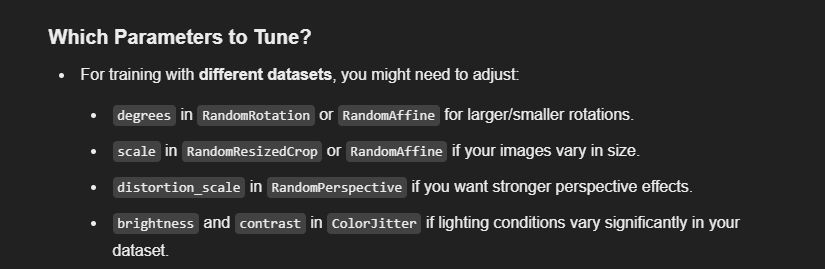

# LOAD DATASET

In [5]:
train_dataset = datasets.ImageFolder(root="dataset/train", transform=train_argumentation)
validation_dataset = datasets.ImageFolder(root="dataset/test", transform=val_transforms)


In [6]:
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True, num_workers=2)
val_loader = DataLoader(validation_dataset, batch_size=32, shuffle=False, num_workers=2)

### key propertises of ImageFolder
=> The ImageFolder class is a dataset wrapper for loading image data from a directory

In [42]:
print(train_dataset.classes)
print(train_dataset.class_to_idx)
# print(train_dataset.samples)
# print(train_dataset.targets)
image, label = train_dataset[0]
print(label)




['bacterial_leaf_blight', 'brown_spot', 'leaf_blast', 'leaf_smut', 'normal']
{'bacterial_leaf_blight': 0, 'brown_spot': 1, 'leaf_blast': 2, 'leaf_smut': 3, 'normal': 4}
0


### Key Properties of DataLoader

In [43]:
print(train_loader.batch_size)

32


In [44]:
train_loader.dataset

Dataset ImageFolder
    Number of datapoints: 3695
    Root location: dataset/train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(224, 224), scale=(0.7, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               ColorJitter(brightness=(0.7, 1.3), contrast=(0.7, 1.3), saturation=(0.7, 1.3), hue=(-0.2, 0.2))
               GaussianBlur(kernel_size=(5, 5), sigma=(0.1, 2.0))
               RandomAffine(degrees=[-20.0, 20.0], translate=(0.1, 0.1), scale=(0.8, 1.2), shear=[-10.0, 10.0])
               RandomPerspective(p=0.5)
               RandomGrayscale(p=0.1)
               ToTensor()
               Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
           )

In [45]:
train_loader.sampler

In [46]:
train_loader.num_workers

2

In [47]:
train_loader.pin_memory

False

In [48]:
train_loader.drop_last

False

### Viewing the report

In [49]:
print("\t\t\t\t DATASET REPORT")
print(f"Class: {train_dataset.classes}")
print(f'Class to index mapping: {train_dataset.samples[:2]}')
print("Target: ", train_dataset.targets[:2])
print("Total Samples: ", len(train_dataset))
print("\n\n\t\t\t\t DATALOADER REPORT")
print("Bath Size:", train_loader.batch_size)
print("Sampler: ", train_loader.sampler)
print("Dataset: ",train_loader.dataset)
print("Number of workers", train_loader.num_workers)

				 DATASET REPORT
Class: ['bacterial_leaf_blight', 'brown_spot', 'leaf_blast', 'leaf_smut', 'normal']
Class to index mapping: [('dataset/train\\bacterial_leaf_blight\\DSC_0365.JPG', 0), ('dataset/train\\bacterial_leaf_blight\\DSC_0366.jpg', 0)]
Target:  [0, 0]
Total Samples:  3695


				 DATALOADER REPORT
Bath Size: 32
Sampler:  <torch.utils.data.sampler.RandomSampler object at 0x0000020197143910>
Dataset:  Dataset ImageFolder
    Number of datapoints: 3695
    Root location: dataset/train
    StandardTransform
Transform: Compose(
               RandomHorizontalFlip(p=0.5)
               RandomHorizontalFlip(p=0.5)
               RandomVerticalFlip(p=0.5)
               RandomRotation(degrees=[-30.0, 30.0], interpolation=nearest, expand=False, fill=0)
               RandomResizedCrop(size=(224, 224), scale=(0.7, 1.0), ratio=(0.75, 1.3333), interpolation=bilinear, antialias=True)
               ColorJitter(brightness=(0.7, 1.3), contrast=(0.7, 1.3), saturation=(0.7, 1.3), hue=(-0.2, 0

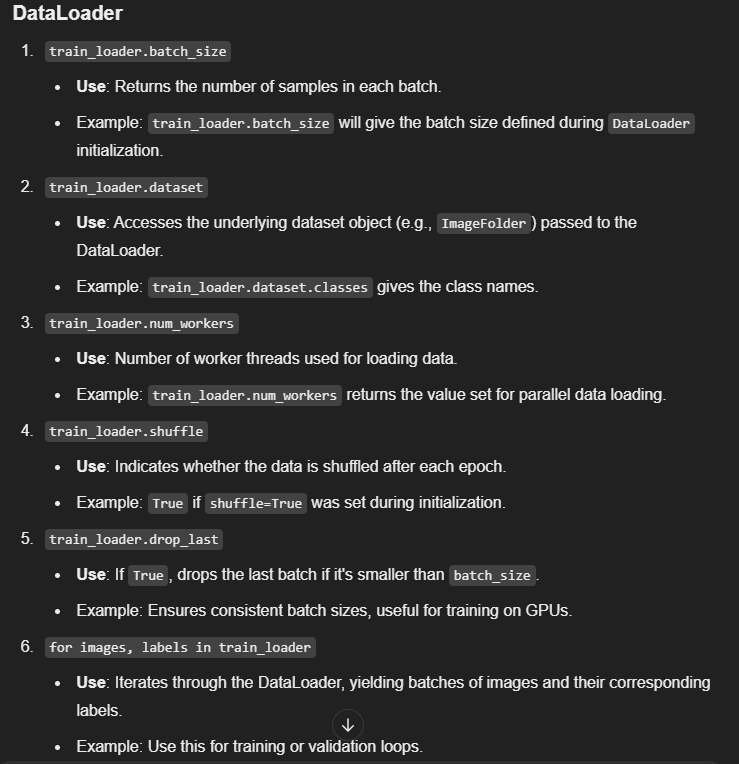
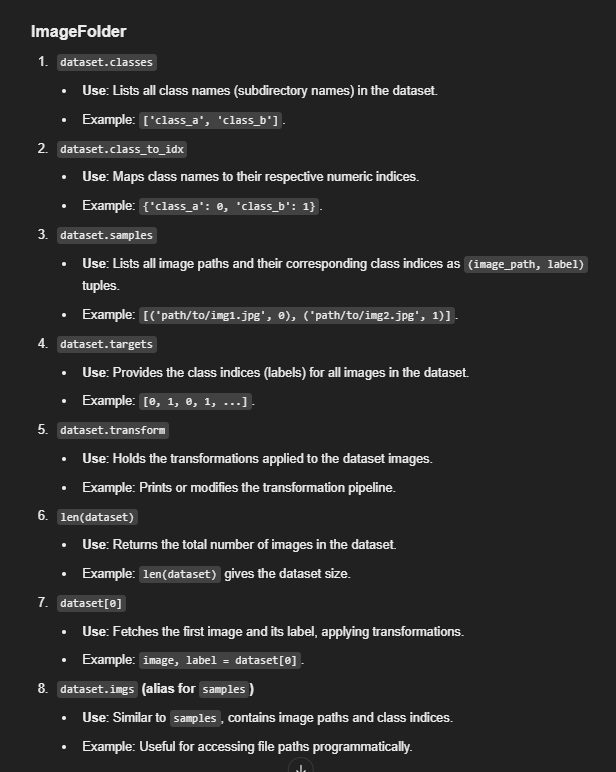

# BASIC CNN

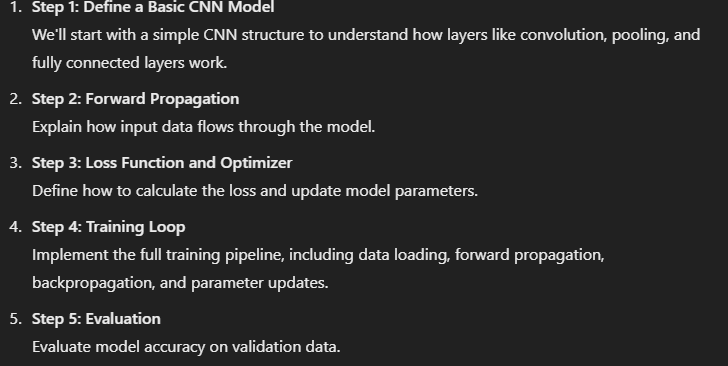

### SOME CNN Bulding block available in PYtorch

## 1) Convolutional Layer
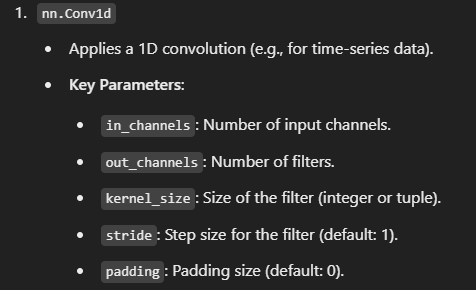
```{python}
conv1d = nn.Conv1d(in_channels=1, out_channels=16, kernel_size=3)
```
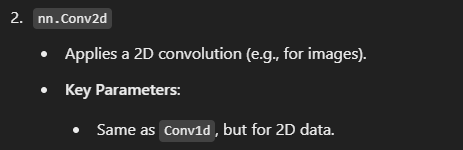
```{python}
sigmoid = nn.Sigmoid()
```
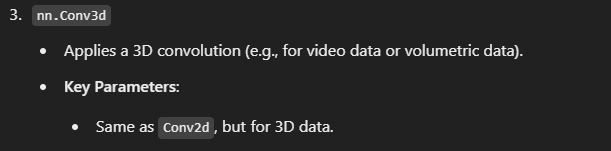
```{python}
conv3d = nn.Conv3d(in_channels=1, out_channels=16, kernel_size=3)
```
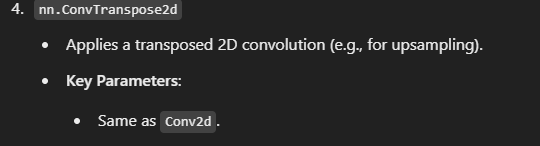
```{python}
deconv2d = nn.ConvTranspose2d(in_channels=16, out_channels=8, kernel_size=3)
```
## 2) Activation Functions
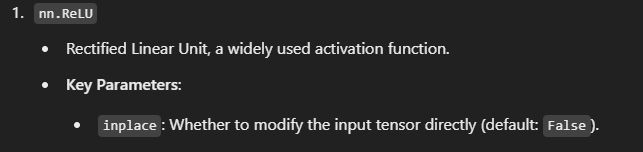
```{python}
relu = nn.ReLU()
```
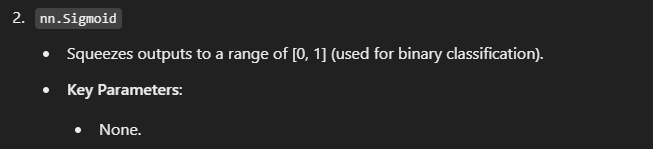
```{python}
sigmoid = nn.Sigmoid()
```
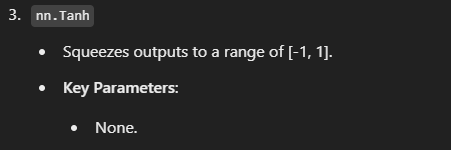
```{python}
tanh = nn.Tanh()
```
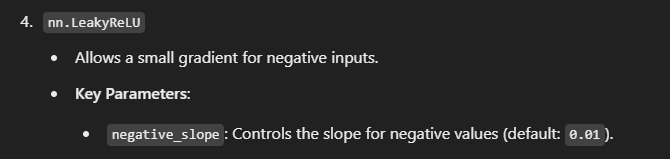
```{python}
leaky_relu = nn.LeakyReLU(negative_slope=0.01)
```
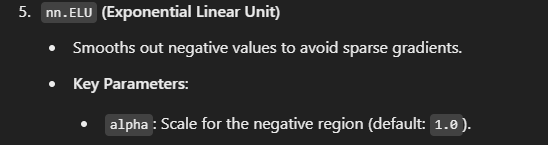
```{python}
elu = nn.ELU()
```
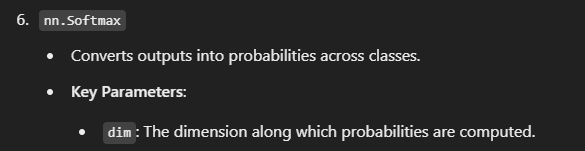
```{python}
softmax = nn.Softmax(dim=1)  # Apply softmax along the class dimension
```
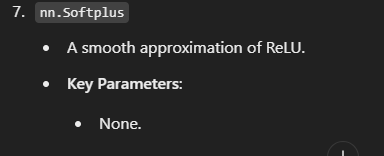
```{python}
tanh = nn.Tanh()
```
## 3) PoolingLayer

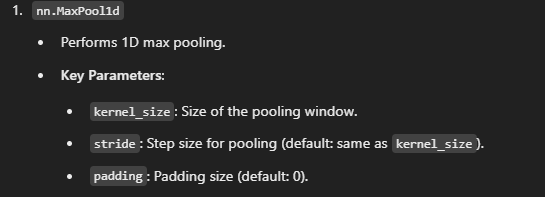

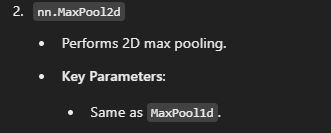
```{python}
maxpool = nn.MaxPool2d(kernel_size=2, stride=2)
```
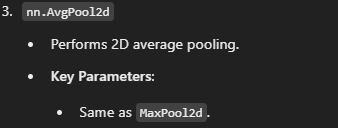
```{python}
avgpool = nn.AvgPool2d(kernel_size=2, stride=2)
```
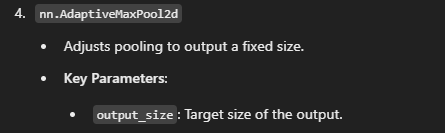
```{python}
adaptive_pool = nn.AdaptiveAvgPool2d((1, 1))

```



### Hard code approch

In [8]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()

        # Define convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Halves the spatial dimensions

        # Fully connected layers
        # In this we need to make sure that the result of last layer and or fatten should properly match the pervious conv dimention or we need to makesure it is handalled dynamickly
        self.fc1 = nn.Linear(32 * 56 * 56, 128)
  # Expecting input size 32x8x8 after flattening
        
        self.fc2 = nn.Linear(128, num_classes)
        self.dropout = nn.Dropout(0.5)  # Regularization

    def forward(self, x):
        # Apply first convolution + activation + pooling
        x = self.pool(nn.functional.relu(self.conv1(x)))

        # Apply second convolution + activation + pooling
        x = self.pool(nn.functional.relu(self.conv2(x)))
        
        # Flatten the tensor dynamically to match batch size
        batch_size = x.size(0)  # Retrieve the batch size dynamically
        x = x.view(batch_size, -1)  # Flatten the tensor for the fully connected layers

        # Pass through fully connected layers
        x = self.dropout(nn.functional.relu(self.fc1(x)))  # Dropout after activation
        x = self.fc2(x)  # Final output layer (logits)

        return x


### Dynamic Approch

In [1]:
import torch.nn as nn

class SimpleCNN(nn.Module):
    def __init__(self, num_classes):
        super(SimpleCNN, self).__init__()

        # Define convolutional layers
        self.conv1 = nn.Conv2d(3, 16, kernel_size=3, stride=1, padding=1)
        self.conv2 = nn.Conv2d(16, 32, kernel_size=3, stride=1, padding=1)
        self.pool = nn.MaxPool2d(2, 2)  # Halves the spatial dimensions

        # Placeholder for the dynamically calculated input size for fc1
        self.fc1_input_size = None  # To be initialized after seeing the input shape

        self.fc1 = None  # Fully connected layer will be initialized dynamically
        self.fc2 = nn.Linear(128, num_classes)  # Output layer
        self.dropout = nn.Dropout(0.5)  # Regularization

    def forward(self, x):
        # Apply convolutional and pooling layers
        x = self.pool(nn.functional.relu(self.conv1(x)))
        x = self.pool(nn.functional.relu(self.conv2(x)))

        # Dynamically initialize fc1 if not already done
        if self.fc1_input_size is None:
            self.fc1_input_size = x.size(1) * x.size(2) * x.size(3)  # Channels × Height × Width
            self.fc1 = nn.Linear(self.fc1_input_size, 128).to(x.device)  # Initialize on the same device as x
        print( x.size(1) * x.size(2) * x.size(3))
        print(x.size(1), x.size(2), x.size(3))
        # Flatten the tensor
        batch_size = x.size(0)
        x = x.view(batch_size, -1)  # Flatten for fully connected layers

        # Pass through fully connected layers
        x = self.dropout(nn.functional.relu(self.fc1(x)))  # Dropout after activation
        x = self.fc2(x)  # Final output layer (logits)

        return x


Output shape: torch.Size([32, 10])


In [2]:
# Create the model
# num_classes = 4  # Example: 10 classes for classification
# model = SimpleCNN(num_classes=num_classes)

# # Dummy Input: Batch size = 4, Channels = 3, Height = 32, Width = 32
# input_tensor = torch.randn(4, 3, 32, 32)

# # Forward Pass
# output = model(input_tensor)

# # print(model.forward(input_tensor))

# # Print Output Shape
# print(f"Output Shape: {output.shape}")

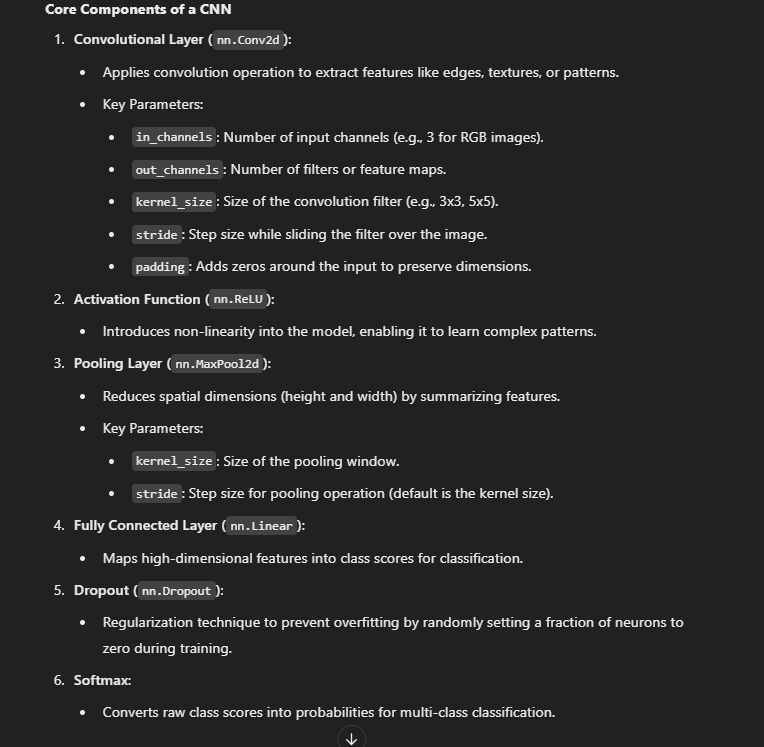
<br><br><br><br><br><br>
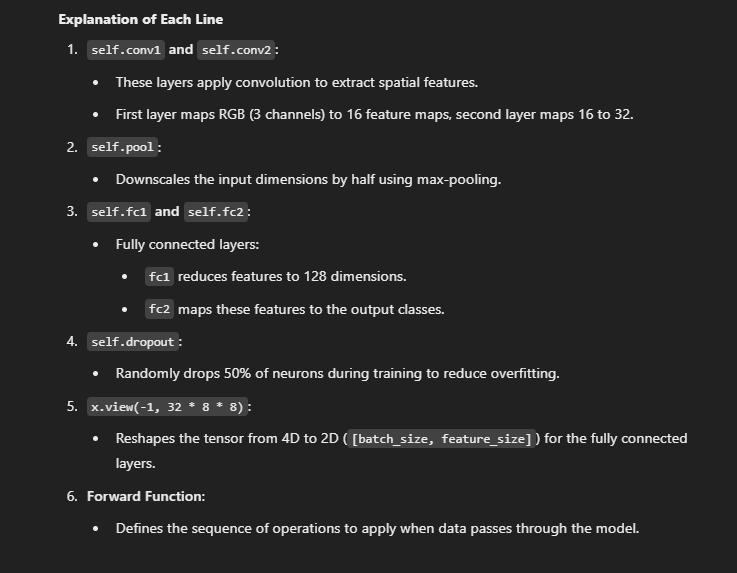
<br><br><br><br><br><br>
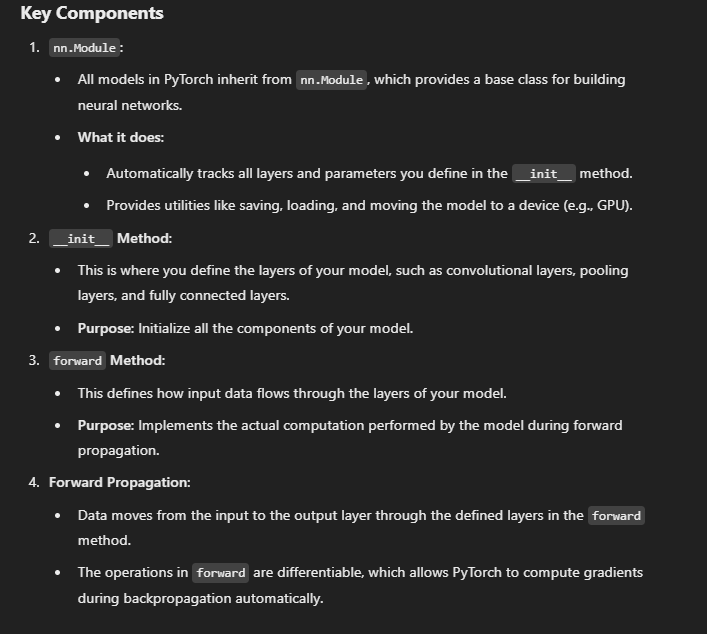
<br><br><br><br><br><br>
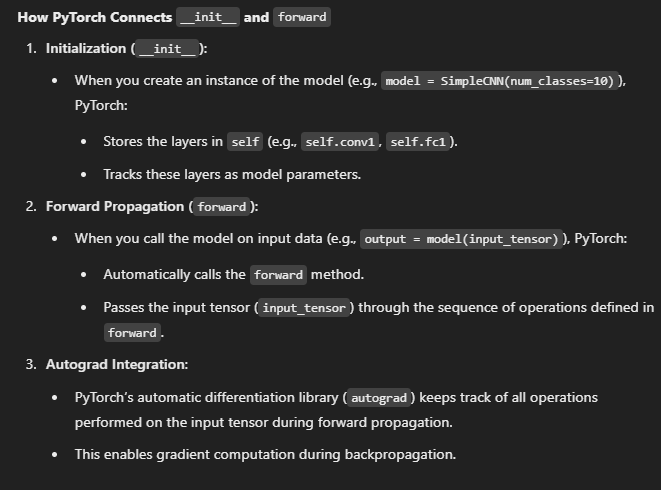
<br><br><br><br><br><br>
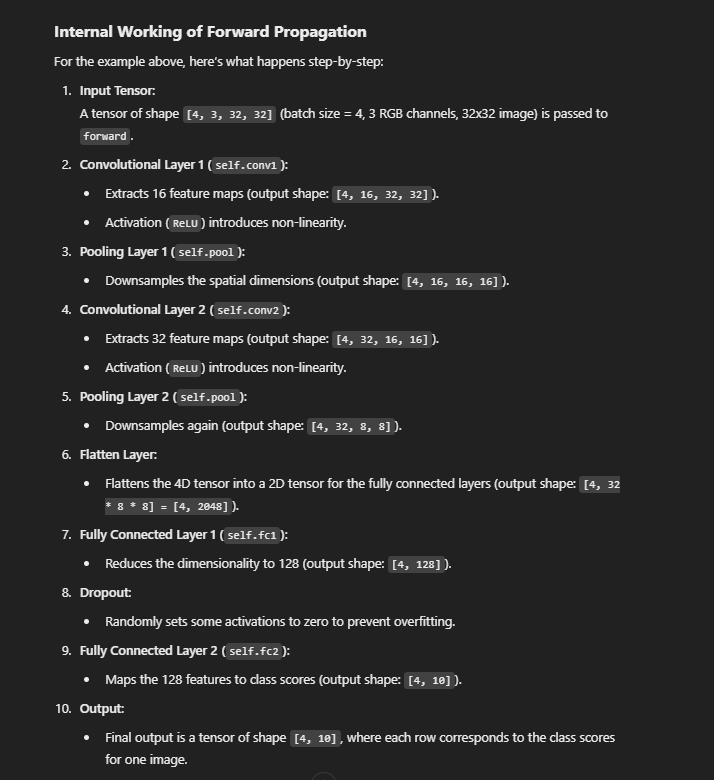

### Optimizer
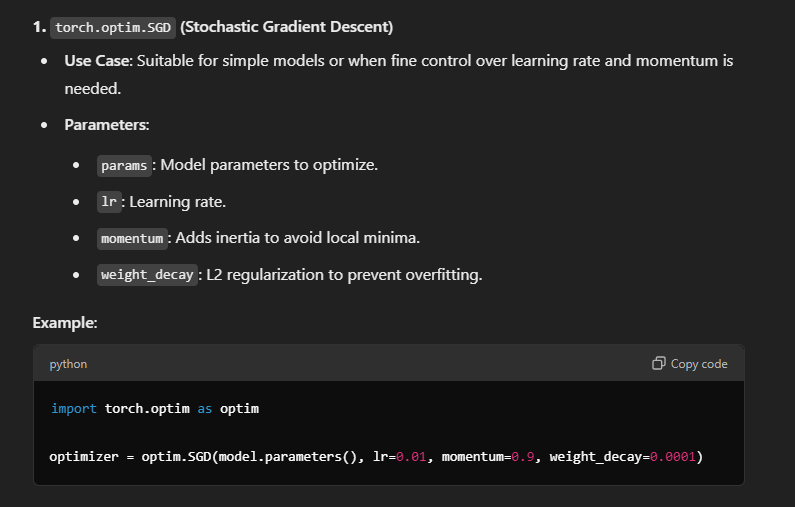
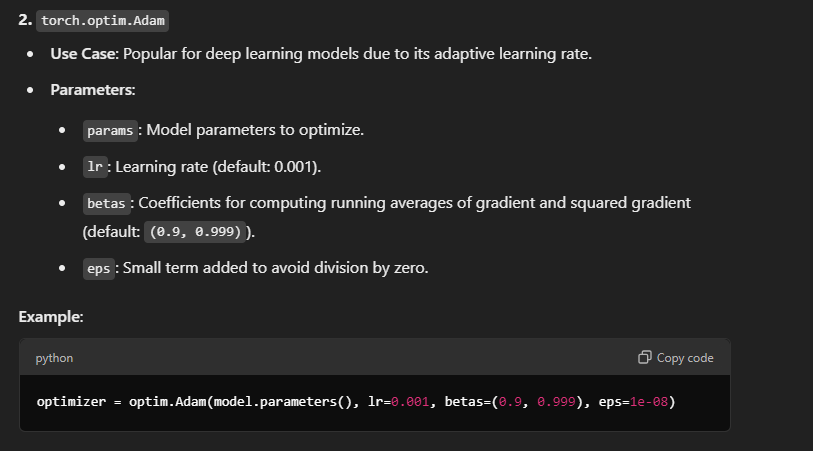
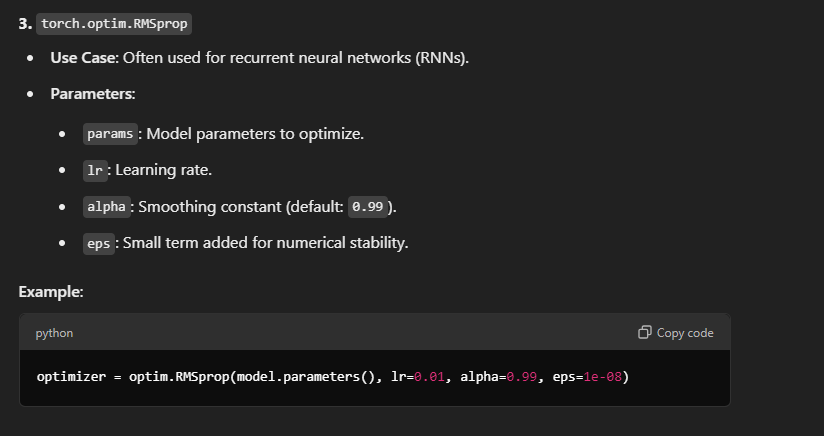
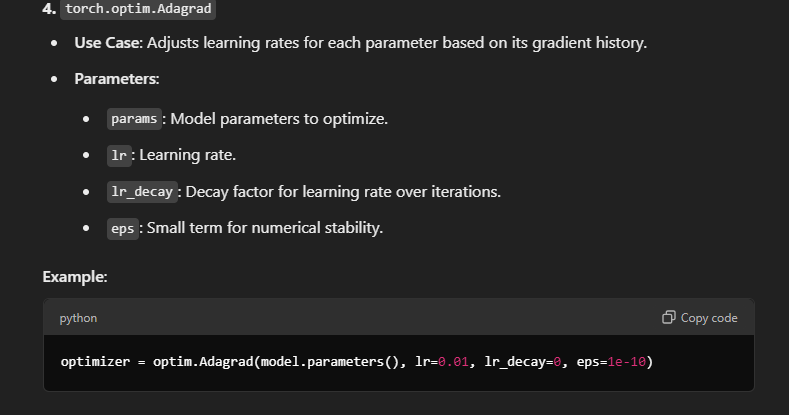
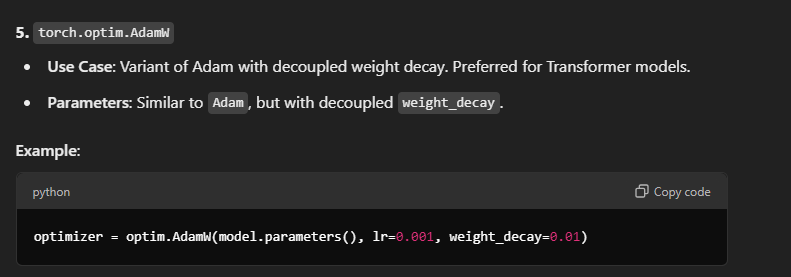
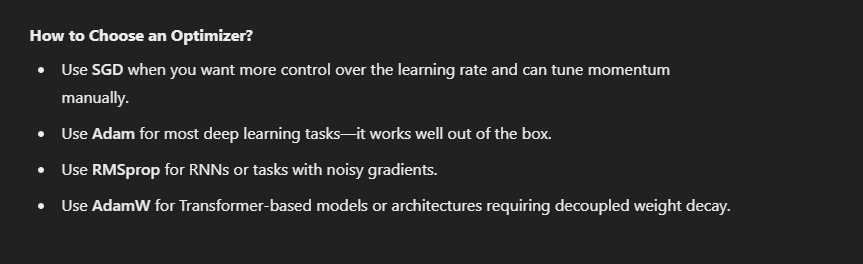

In [54]:
# Define optimizer
# import torch.optim as optim
# optimizer = optim.Adam(model.parameters(), lr=0.001)

# What is a Loss Function?
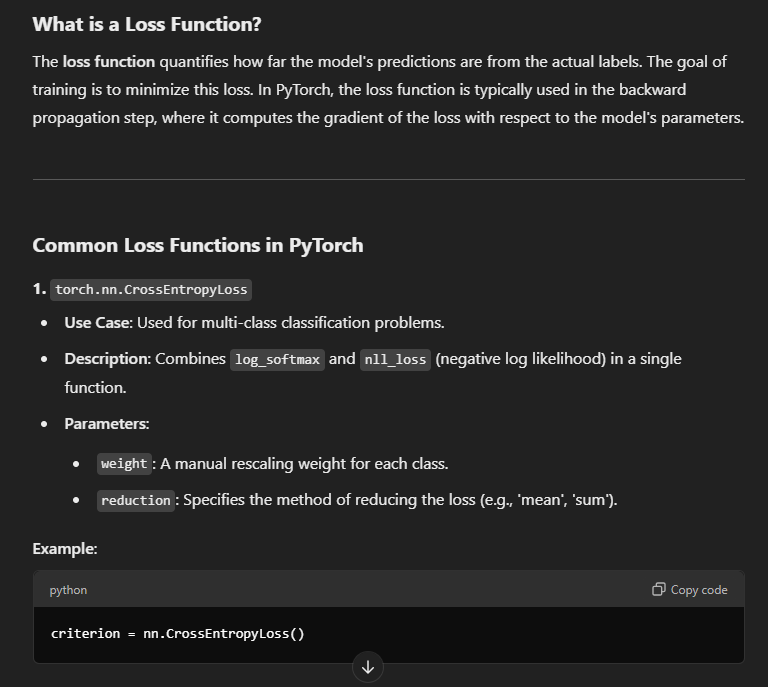
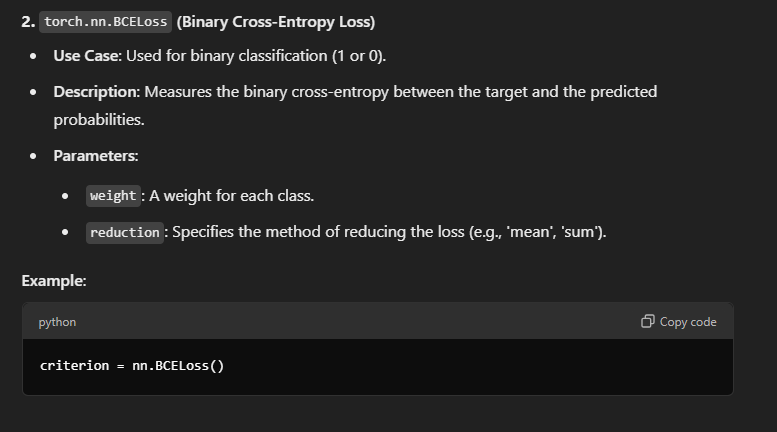
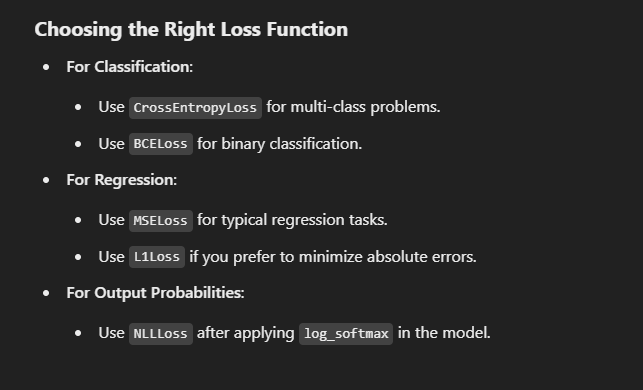

## Initalizing ans training the model

In [9]:
model = SimpleCNN(5)

In [10]:
import torch
criterion = nn.CrossEntropyLoss()


# Define optimizer
import torch.optim as optim
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Number of epochs for training
num_epochs = 10

# Loop over the dataset multiple times
for epoch in range(num_epochs):
    model.train()  # Set the model to training mode

    running_loss = 0.0
    correct = 0
    total = 0
    
    # Iterate over the data
    for inputs, targets in train_loader:
        # Zero the gradients
        
        # print(targets)
        
        # Forward pass
        outputs = model(inputs)  # Predict outputs for the input batch
        # print(outputs.shape)
        # Calculate the loss
        loss = criterion(outputs, targets)
        
        # Backward pass (compute gradients)
        loss.backward()
        
        # Update model parameters using optimizer
        optimizer.step()
        
        # Track loss for reporting
        running_loss += loss.item()
        
        # Track accuracy (for classification)
        _, predicted = torch.max(outputs, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    # Print statistics for each epoch
    epoch_loss = running_loss / len(train_loader)
    epoch_accuracy = 100 * correct / total
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Accuracy: {epoch_accuracy:.2f}%")


Epoch [1/10], Loss: 2.0115, Accuracy: 29.01%
Epoch [2/10], Loss: 1.5223, Accuracy: 36.13%
Epoch [3/10], Loss: 1.5190, Accuracy: 32.58%
Epoch [4/10], Loss: 1.5041, Accuracy: 36.10%
Epoch [5/10], Loss: 1.5028, Accuracy: 36.10%
Epoch [6/10], Loss: 1.5022, Accuracy: 36.10%
Epoch [7/10], Loss: 1.5100, Accuracy: 36.10%
Epoch [8/10], Loss: 1.5131, Accuracy: 36.10%
Epoch [9/10], Loss: 1.5107, Accuracy: 36.10%
Epoch [10/10], Loss: 1.5111, Accuracy: 36.10%


In [ ]:
import torch
import torch.nn as nn
from torchvision import models

# Step 1: Load pre-trained ResNet
resnet = models.resnet18(pretrained=True)

# Step 2: Replace the final fully connected layer
# num_classes is the number of classes in your dataset
num_classes = 10  # Example: 10-class problem
resnet.fc = nn.Linear(resnet.fc.in_features, num_classes)

# Step 3: Unfreeze layers (optional)
for param in resnet.parameters():
    param.requires_grad = True  # Unfreeze all layers

# Step 4: Define loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(resnet.parameters(), lr=0.001)

# Model is now ready for fine-tuning


In [ ]:
import torch

# Check if GPU is available
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

# Move the model to the appropriate device
resnet.to(device)

# Training parameters
num_epochs = 10  # Adjust based on your dataset size
best_val_loss = float("inf")

# Training loop
for epoch in range(num_epochs):
    resnet.train()  # Set the model to training mode
    train_loss = 0.0
    correct = 0
    total = 0
    
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        
        # Backpropagation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        # Accumulate loss and accuracy
        train_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()
    
    train_loss /= len(train_loader.dataset)
    train_acc = 100 * correct / total

    # Validation loop
    resnet.eval()  # Set the model to evaluation mode
    val_loss = 0.0
    correct = 0
    total = 0

    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            
            outputs = resnet(inputs)
            loss = criterion(outputs, labels)
            
            val_loss += loss.item() * inputs.size(0)
            _, predicted = outputs.max(1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()
    
    val_loss /= len(val_loader.dataset)
    val_acc = 100 * correct / total

    print(f"Epoch {epoch+1}/{num_epochs}")
    print(f"  Train Loss: {train_loss:.4f} | Train Acc: {train_acc:.2f}%")
    print(f"  Val Loss: {val_loss:.4f} | Val Acc: {val_acc:.2f}%")
    
    # Save the best model
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        torch.save(resnet.state_dict(), "best_model.pth")
        print("Model saved!")

print("Training complete!")


In [ ]:
# Load the best model
resnet.load_state_dict(torch.load("best_model.pth"))
resnet.to(device)

# Set the model to evaluation mode
resnet.eval()

# Initialize test metrics
test_loss = 0.0
correct = 0
total = 0

# Evaluate on test data
with torch.no_grad():
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        # Forward pass
        outputs = resnet(inputs)
        loss = criterion(outputs, labels)
        
        test_loss += loss.item() * inputs.size(0)
        _, predicted = outputs.max(1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

# Compute overall test loss and accuracy
test_loss /= len(test_loader.dataset)
test_acc = 100 * correct / total

print(f"Test Loss: {test_loss:.4f}")
print(f"Test Accuracy: {test_acc:.2f}%")


In [1]:
from tqdm import tqdm

ModuleNotFoundError: No module named 'tqdm'

In [2]:
from tqdm import tqdm
import torch

# Dummy training loop
epochs = 10
for epoch in range(epochs):
    print(f"Epoch {epoch + 1}/{epochs}")
    # Create a tqdm progress bar for batches
    for batch in tqdm(range(100), desc=f"Training Epoch {epoch+1}"):
        # Simulate loss computation
        loss = torch.randn(1).item()  # Replace with your loss computation
        # Simulate GPU memory usage and other metrics
        gpu_mem = "0.872G"  # Example GPU memory usage (update dynamically in your code)
        print(f"GPU_mem: {gpu_mem}, Loss: {loss:.4f}", end="\r")
    print()  # Add a newline after each epoch


Epoch 1/10


Training Epoch 1: 100%|██████████| 100/100 [00:00<00:00, 5020.59it/s]


GPU_mem: 0.872G, Loss: -1.8439
Epoch 2/10


Training Epoch 2: 100%|██████████| 100/100 [00:00<00:00, 65968.92it/s]


GPU_mem: 0.872G, Loss: 0.26264
Epoch 3/10


Training Epoch 3: 100%|██████████| 100/100 [00:00<00:00, 50063.31it/s]


GPU_mem: 0.872G, Loss: 1.41973
Epoch 4/10


Training Epoch 4: 100%|██████████| 100/100 [00:00<00:00, 39730.07it/s]


GPU_mem: 0.872G, Loss: -1.2529
Epoch 5/10


Training Epoch 5: 100%|██████████| 100/100 [00:00<00:00, 39699.99it/s]


GPU_mem: 0.872G, Loss: -0.6648
Epoch 6/10


Training Epoch 6: 100%|██████████| 100/100 [00:00<00:00, 49280.98it/s]


GPU_mem: 0.872G, Loss: -0.6269
Epoch 7/10


Training Epoch 7: 100%|██████████| 100/100 [00:00<00:00, 48640.89it/s]


GPU_mem: 0.872G, Loss: -1.3100
Epoch 8/10


Training Epoch 8: 100%|██████████| 100/100 [00:00<00:00, 24482.28it/s]


GPU_mem: 0.872G, Loss: -0.6619
Epoch 9/10


Training Epoch 9: 100%|██████████| 100/100 [00:00<00:00, 48953.13it/s]


GPU_mem: 0.872G, Loss: 0.44144
Epoch 10/10


Training Epoch 10: 100%|██████████| 100/100 [00:00<00:00, 30908.65it/s]

GPU_mem: 0.872G, Loss: -1.1591
